# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [17]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [18]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

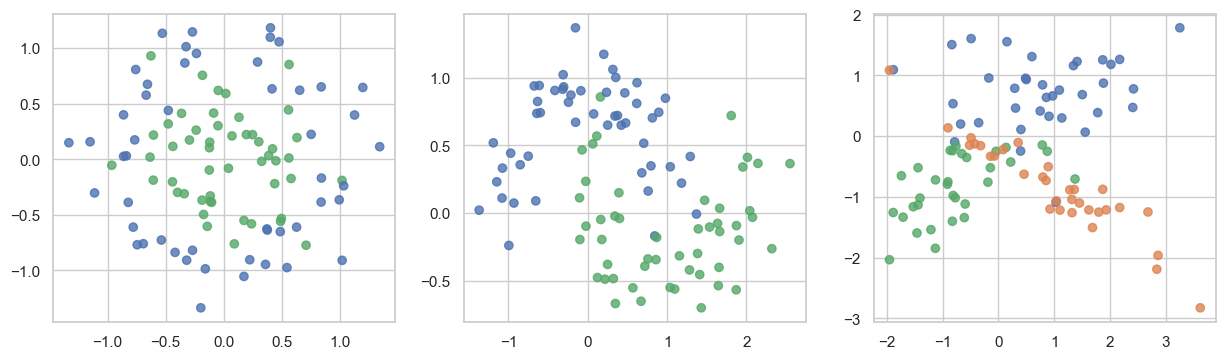

In [19]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [20]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

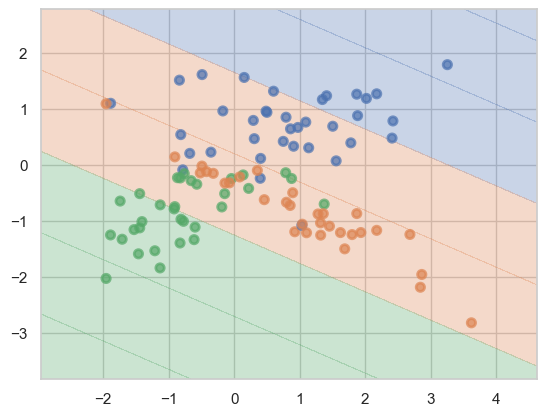

In [21]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

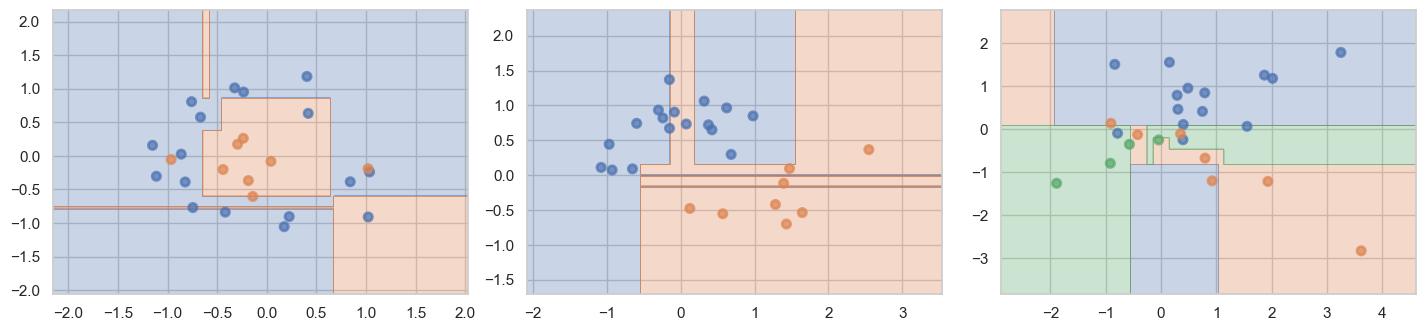

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

df_accuracy = pd.DataFrame({'Dataset_Name': ['moons', 'circles', 'classification'], \
    'Dataset_Num': [1, 2, 3],\
    'Acc_train': [0,0,0], 'Acc_test': [0,0,0] })
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree = clf_tree.fit(X_train, y_train)
    #print(clf_tree.get_n_leaves())

    plt.subplot(1, 3, i + 1)
    plot_surface(clf_tree, X_test, y_test) 

    df_accuracy.loc[df_accuracy['Dataset_Num'] == i+1,'Acc_train'] = accuracy_score(y_train, clf_tree.predict(X_train))
    df_accuracy.loc[df_accuracy['Dataset_Num'] == i+1,'Acc_test'] = accuracy_score(y_test, clf_tree.predict(X_test))

    


In [23]:
df_accuracy

,Dataset_Name,Dataset_Num,Acc_train,Acc_test
0,moons,1,1,0.76
1,circles,2,1,0.92
2,classification,3,1,0.72


__Ответ:__ сильнее всех переобучился на мультиклассовых данных, меньше всех на данных второго датасета

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

{'max_depth': 5, 'min_samples_leaf': 1}
{'max_depth': 5, 'min_samples_leaf': 1}
{'max_depth': 5, 'min_samples_leaf': 15}


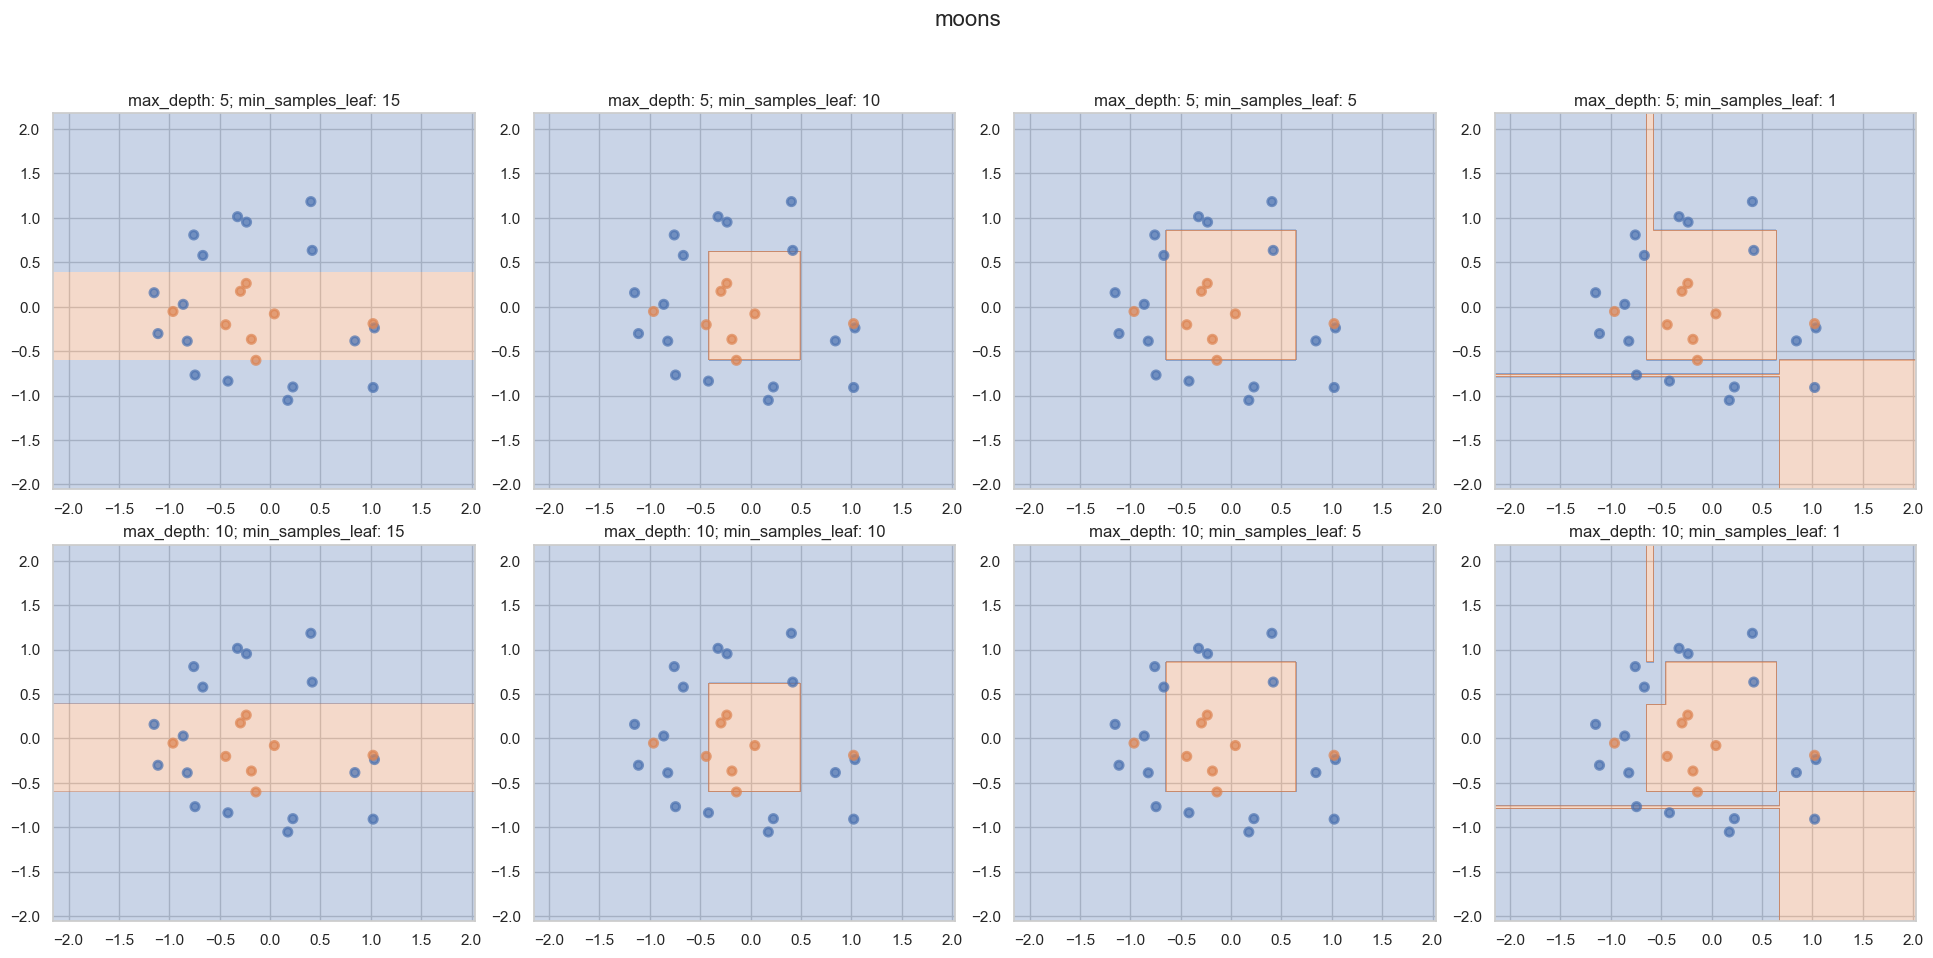

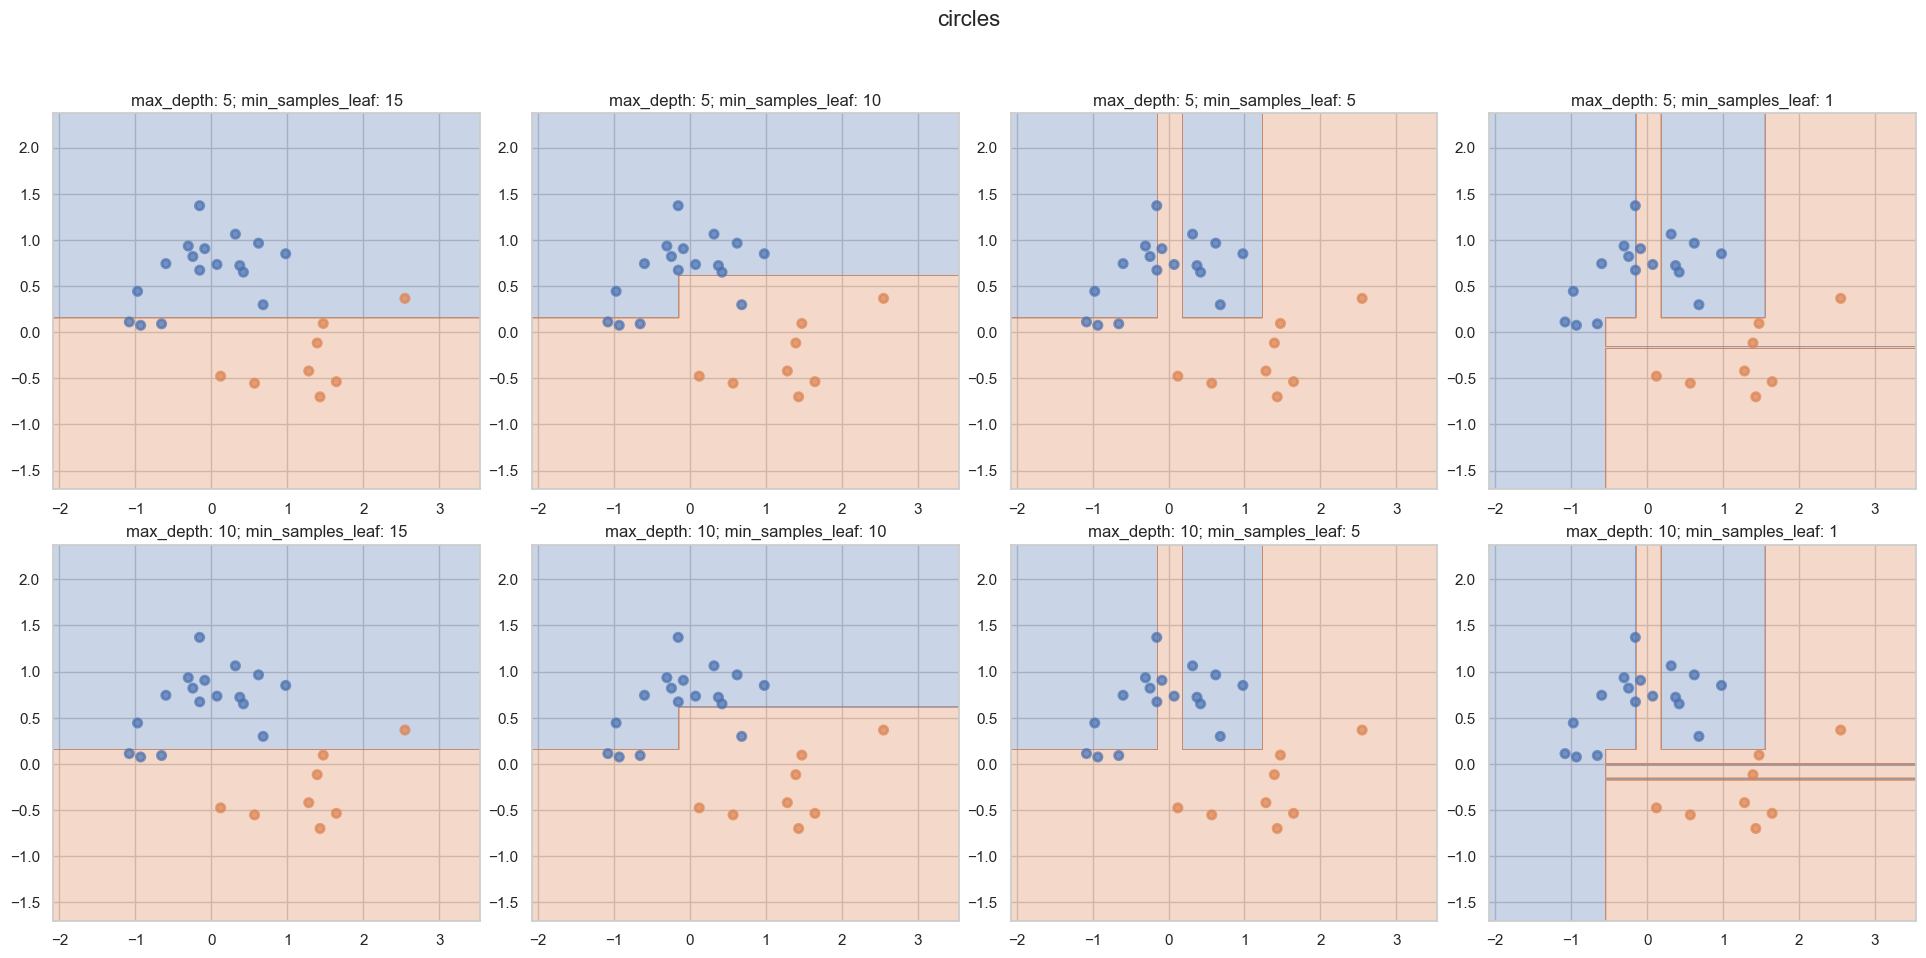

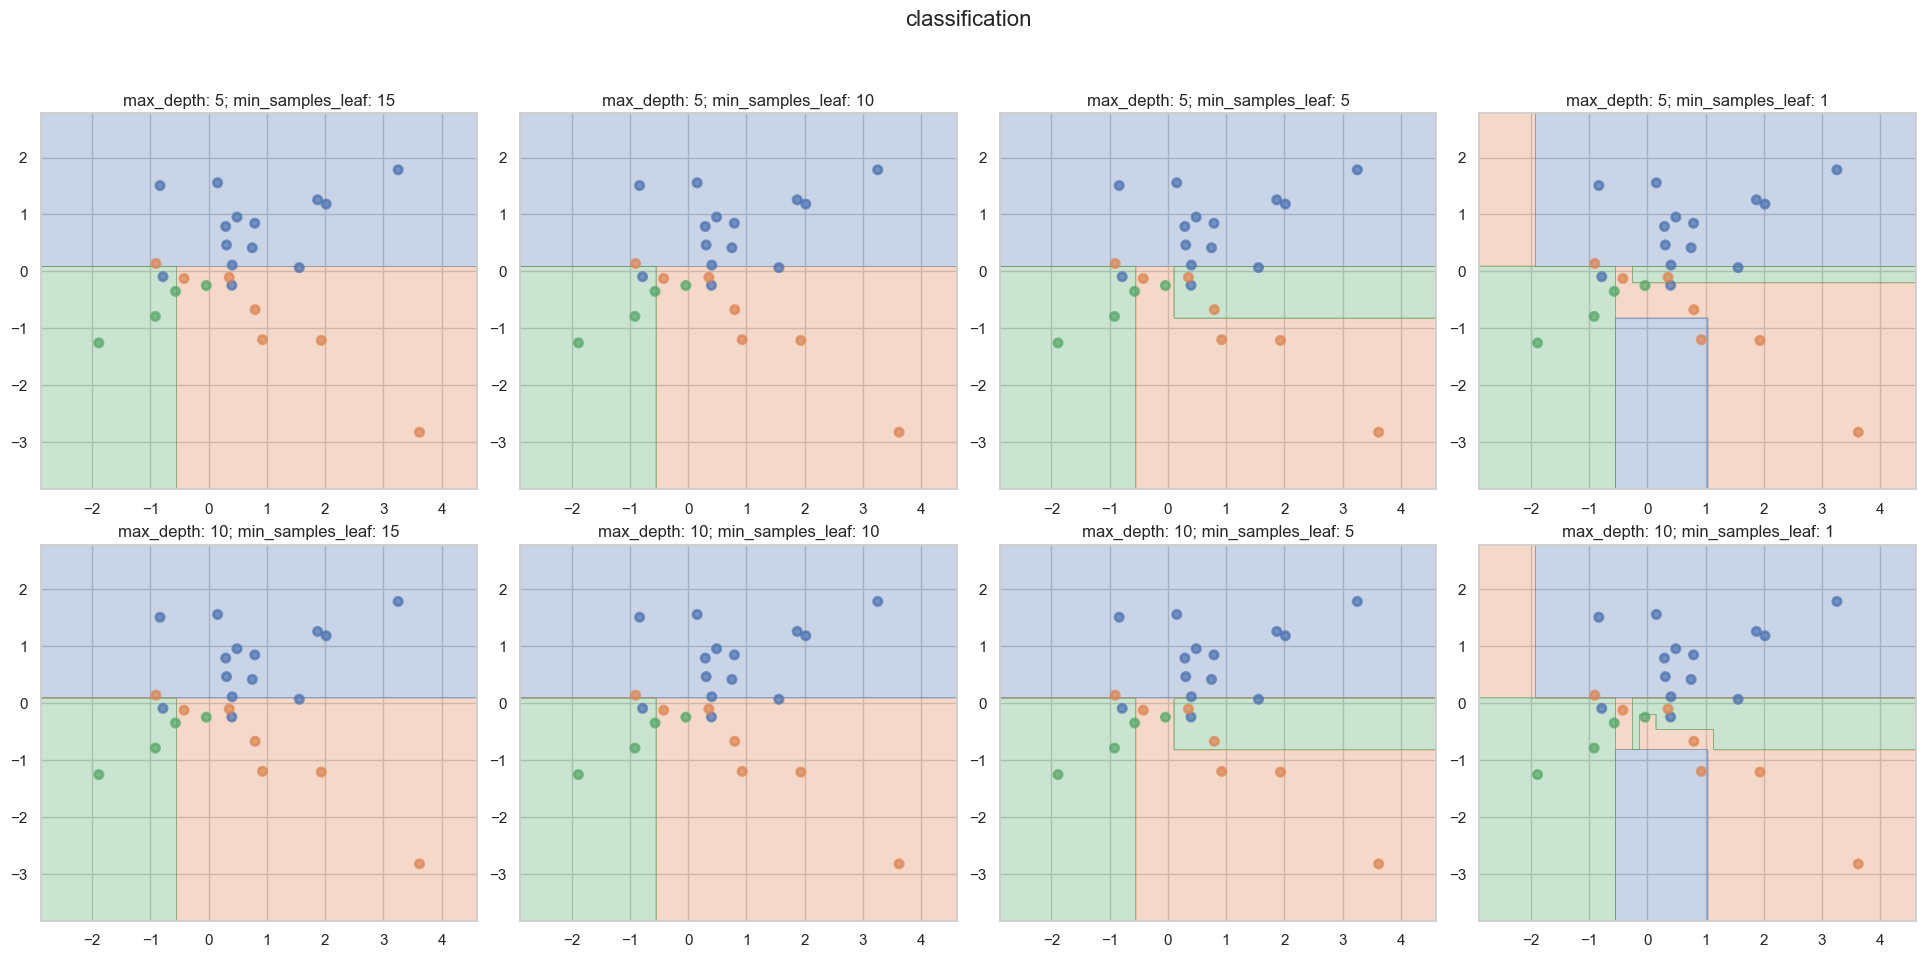

In [24]:
from sklearn.model_selection import GridSearchCV

for name, (x,y) in enumerate(datasets):
    clf_tree = tree.DecisionTreeClassifier()
    parameters = {'max_depth': [5, 10], 'min_samples_leaf':[15, 10, 5, 1]}

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    tree_cv = GridSearchCV(clf_tree, parameters)
    clf_tree = tree_cv.fit(X_train, y_train)
    print(clf_tree.best_params_)

    plt.figure(figsize=(20, 10))
    plt.suptitle(str(list(df_accuracy.loc[df_accuracy['Dataset_Num'] == name+1,'Dataset_Name'])[0]), fontsize=16)
    i = 0
    for depth_ in parameters['max_depth']:
        for leaf in parameters['min_samples_leaf']:

                clf_tree = tree.DecisionTreeClassifier(max_depth=depth_, min_samples_leaf=leaf)
                clf_tree = clf_tree.fit(X_train, y_train)
                plt.subplot(2, 4, i + 1)
                plt.title('max_depth: ' + str(depth_) + '; min_samples_leaf: '+ str(leaf))
                plot_surface(clf_tree, X_test, y_test) 
                i = i + 1

    

__Ответ:__ Для наглядности выбирала два параметра глубины и 4 параметра для минимального размера листа. С ростом глубины деревья переобучаются: появляются странные разбияния, довольно узкие

С ростом минимального размера листа, наоборот, разбиения получаются довольно общие. Более того, можно заметить, что для больших размеров листа (10, 15) картинка не меняется с ростом максимальной глубины: алгоритм быстрее упирается в ограничение по размеру листов. Для минимального размера листа =1 наооблорот ограничение по глубине становится останавливающим фактором для переобучения дерева и картинки различаются, появляются странные деления)

Так, ограничения глубины и размера листа помогают бороться с переобучением.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [25]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%autoreload 2
import hw5code
from hw5code import find_best_split
from hw5code import DecisionTree


In [27]:
df = pd.read_csv('students.csv')

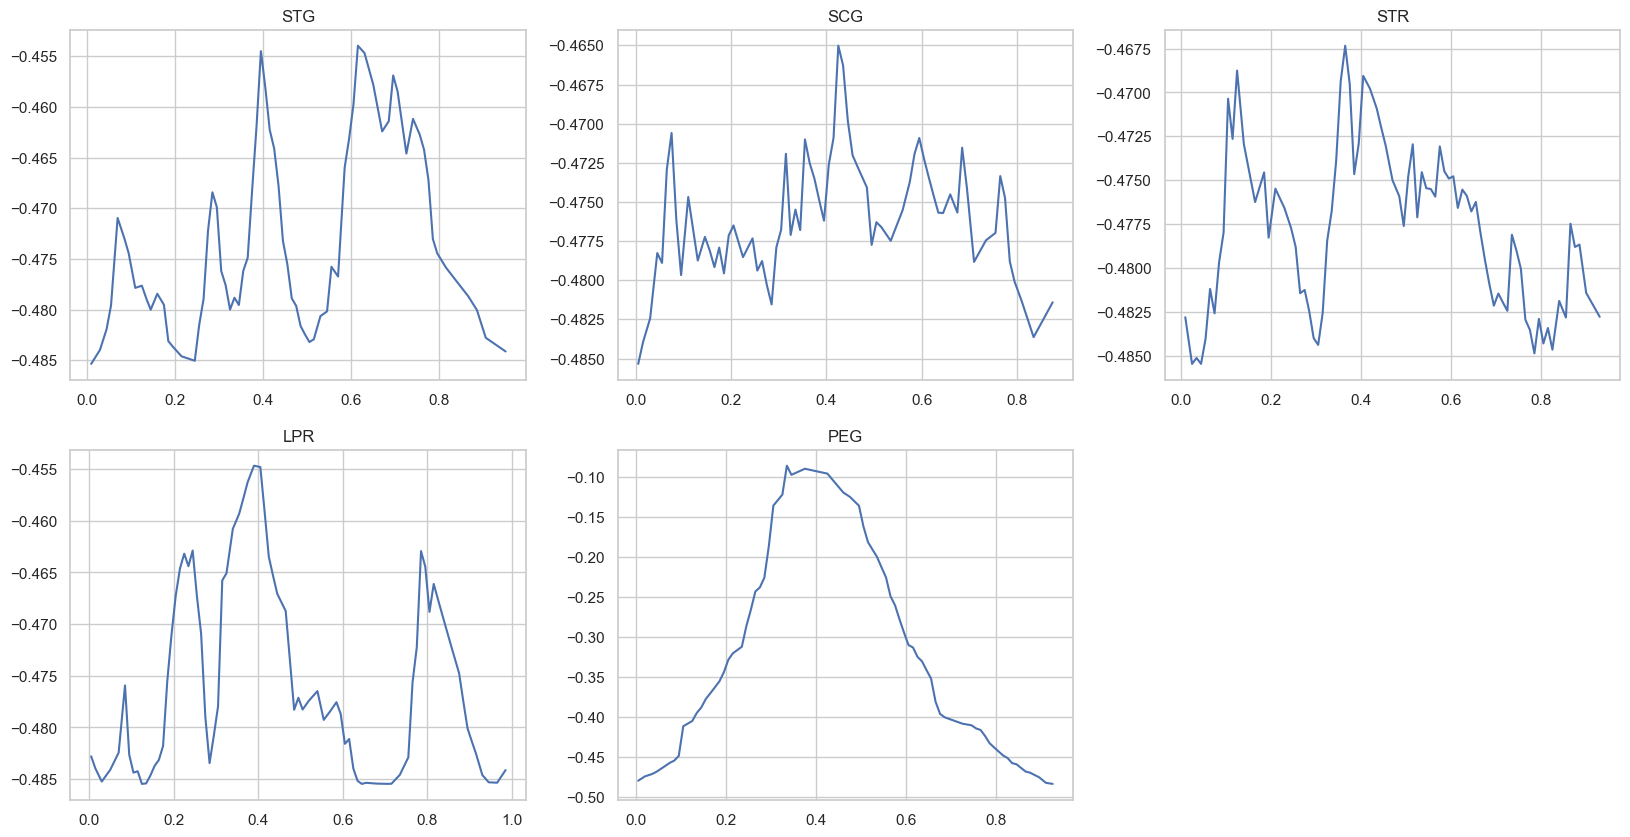

In [28]:
plt.figure(figsize=(20, 10))
i = 0

for feat in df.columns[0:df.shape[1]-1]:
    plt.subplot(2, 3, i + 1)
    plt.title(feat)
    thresholds, ginis, _, _ = find_best_split(df[feat], df.iloc[:,5])
    plt.plot(thresholds, ginis)
    i = i + 1

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

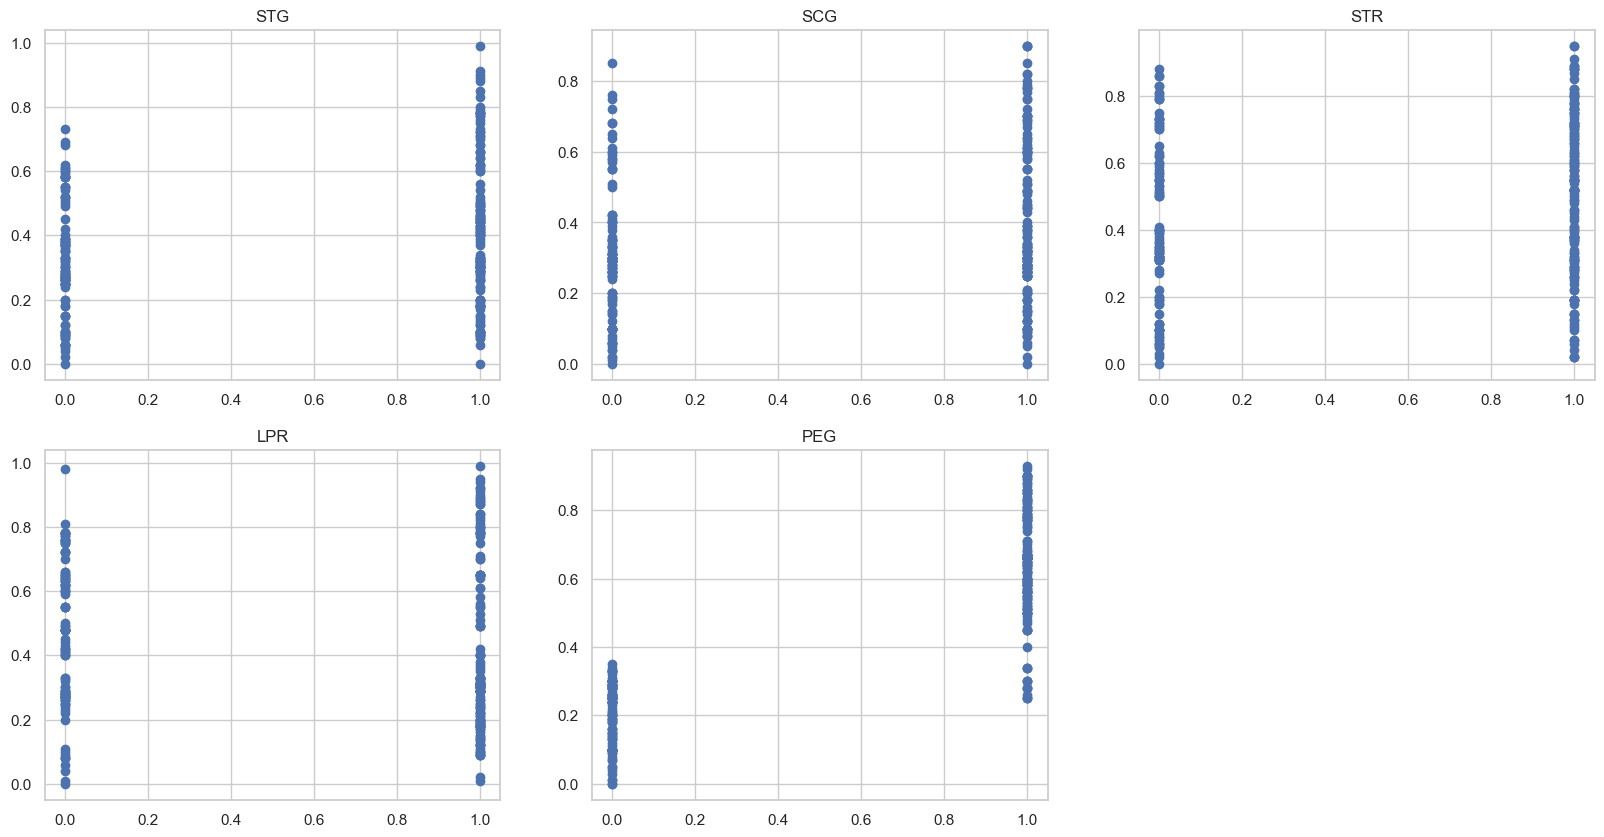

In [29]:
plt.figure(figsize=(20, 10))
i = 0

for feat in df.columns[0:df.shape[1]-1]:
    plt.subplot(2, 3, i + 1)
    plt.title(feat)
    
    plt.scatter( df.iloc[:, 5], df[feat])
    i = i + 1

**Ответ:** по последнему, для него наибольшие значения критерия Джини. Результат анализа кривых значений Джини совпадает с анализом графиков выше: для последней фичи классы распределены достаточно далеко друг от друга! И деление около 0.4 выглядит оптимально

Вид кривой для хороших признаков - парабола ветвями вниз. Значения фичей хорошо разделяются по классам -> есть одна точка оптимума где-то посередине значений признака. если берем слишком маленькие значения - низкий критерий, так как и если берем слишком большие  

У таких кривых несколько локальных максимумов, значения критерия могут маленькими как для больших, так и для маленьких трешхолдов. Наверное, худший случай - кривая в виде прямой линии. Это для абсолютно неразделимых классов (все значения признаков повторяются с разными таргетами, типо в одной точке два класса и так для всех точек).


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [96]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

ms = pd.read_fwf('agaricus-lepiota.data', delimiter=",")
le = preprocessing.LabelEncoder()
ms_le = ms.apply(LabelEncoder().fit_transform)
y  = ms_le.iloc[:,0]
x = ms_le.iloc[:, 1:ms_le.shape[1]]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [99]:
clf = DecisionTree(np.repeat('categorical', x.shape[1]))
clf.fit(np.array(X_train),np.array(y_train))
preds = clf.predict(np.array(X_test))

#### Accuracy -> 1

In [83]:
accuracy_score(y_test, preds)

1.0

In [84]:
np.sum(preds)

1951

#### Дерево

In [85]:
getattr(clf, '_tree')

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [0, 3, 5],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [2, 3, 4, 1, 0, 8, 6, 7],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [6, 5, 2, 3, 7, 4],
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'categories_split': [2, 0, 3],
    'left_child': {'type': 'nonterminal',
     'feature_split': 0,
     'categories_split': [4, 5, 2, 0, 3],
     'left_child': {'type': 'nonterminal',
      'feature_split': 14,
      'categories_split': [6, 5, 2, 3, 7],
      'left_child': {'type': 'nonterminal',
       'feature_split': 21,
       'categories_split': [6, 0, 3, 1, 4, 5],
       'left_child': {'type': 'nonterminal',
        'class': 0,
        'feature_split': 0,
        'categories_split': [5],
        'left_child': {'type': 'nonterminal',
         'class': 0,
         'feature_split': 1,
         'categories_split': [3],
         

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

Вроде сделала

In [36]:
ttt = pd.read_fwf('tic-tac-toe.data', delimiter=",")

le = preprocessing.LabelEncoder()
ttt_le = ttt.apply(LabelEncoder().fit_transform)

y  = ttt_le.iloc[:,ttt_le.shape[1]-1]
x = ttt_le.iloc[:, 0:ttt_le.shape[1]-2]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

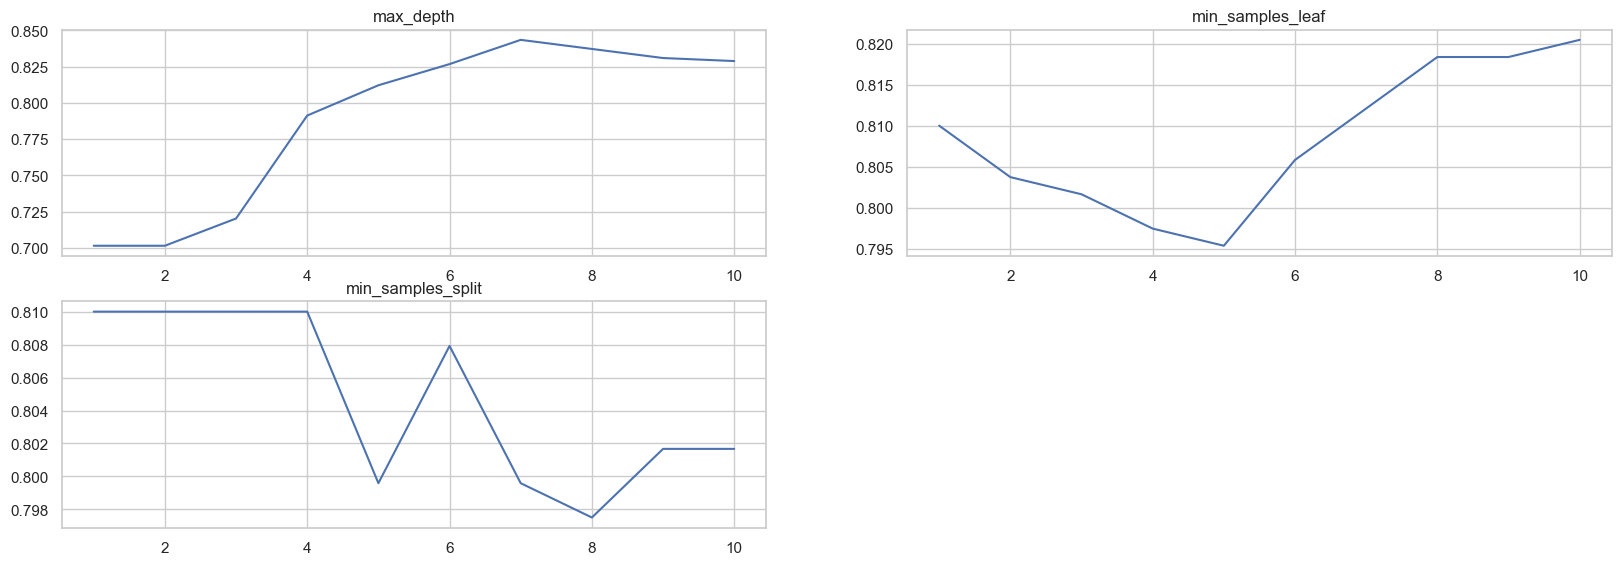

In [37]:
plt.figure(figsize=(20, 10))
clf_tree = DecisionTree(feature_types = np.repeat('categorical', X_train.shape[1]))
parameters = {'_max_depth': np.linspace(1,10,10), '_min_samples_leaf':np.linspace(1,10,10), '_min_samples_split':np.linspace(1,10,10)}

#tree_cv = GridSearchCV(clf_tree, parameters)
clf_tree.fit(np.array(X_train), np.array(y_train))
#plt.suptitle(str(list(df_accuracy.loc[df_accuracy['Dataset_Num'] == name+1,'Dataset_Name'])[0]), fontsize=16)

acc = []
for depth_ in parameters['_max_depth']:

    clf_tree = DecisionTree(feature_types = np.repeat('categorical', X_train.shape[1]), max_depth=depth_)
    clf_tree.fit(np.array(X_train), np.array(y_train))
    preds = clf_tree.predict(np.array(X_test))
    acc.append(accuracy_score(y_test, preds))

depths = zip(np.array(parameters['_max_depth']), np.array(acc))
plt.subplot(3, 2, 1)
plt.title('max_depth')
plt.plot(np.array(parameters['_max_depth']), np.array(acc))

acc = []
for leaf in parameters['_min_samples_leaf']:
    
    clf_tree = DecisionTree(feature_types = np.repeat('categorical', X_train.shape[1]), min_samples_leaf=leaf)
    clf_tree.fit(np.array(X_train), np.array(y_train))
    
    preds = clf_tree.predict(np.array(X_test))
    acc.append(accuracy_score(y_test, preds))

plt.subplot(3, 2, 2)
plt.title('min_samples_leaf')
plt.plot(np.array(parameters['_min_samples_leaf']), np.array(acc))

acc= []
for size in parameters['_min_samples_split']:
    
    clf_tree = DecisionTree(feature_types = np.repeat('categorical', X_train.shape[1]), min_samples_split = size)
    clf_tree.fit(np.array(X_train), np.array(y_train))
    preds = clf_tree.predict(np.array(X_test))
    acc.append(accuracy_score(y_test, preds))

plt.subplot(3, 2, 3)
plt.title('min_samples_split')

plt.plot(np.array(parameters['_min_samples_split']), np.array(acc))

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [217]:
# import datasets

mashrooms = pd.read_fwf('agaricus-lepiota.data', delimiter=",")
tictac = pd.read_fwf('tic-tac-toe.data', delimiter=",")
car = pd.read_csv('car.data', delimiter=",", header = None, names = ['buying', 'maint', 'doors','persons', 'lug_boot', 'safety', 'target'])
nursery = pd.read_csv('nursery.data', delimiter=",", header = None)

df_list = [mashrooms, tictac, car, nursery]


In [218]:

car.iloc[:, -1][car.iloc[:, -1].isin(['unacc', 'acc']) ] = 0
car.iloc[:, -1][car.iloc[:, -1]!=0] = 1

In [219]:

nursery.iloc[:, -1][nursery.iloc[:, -1].isin(['not_recom', 'recommend']) ] = 0
nursery.iloc[:, -1][nursery.iloc[:, -1]!=0] = 1

In [220]:
#LE
mashrooms = mashrooms.apply(LabelEncoder().fit_transform)
tictac = tictac.apply(LabelEncoder().fit_transform)
car = car.apply(LabelEncoder().fit_transform)
nursery = nursery.apply(LabelEncoder().fit_transform)

m_y = mashrooms.iloc[:, 0]
m_X = mashrooms.iloc[:, 1:mashrooms.shape[1]]

t_y = tictac.iloc[:, -1]
t_X = tictac.iloc[:, 0:tictac.shape[1]-1]


c_X = car.iloc[:, 0:car.shape[1]-1]
c_y = car.iloc[:, -1]

n_X = nursery.iloc[:, 0:nursery.shape[1]-1]
n_y = nursery.iloc[:, -1]

In [224]:

df_metrics = pd.DataFrame({'dataset': np.repeat(['Mashrooms', 'TictacToe', 'Nursery', 'Cars'], 5), \
    'type': np.tile(['real', 'categorical', 'ohe', 'sklearn_real', 'sklearn_ohe'],4), 'acc': np.repeat(0,20)})

In [226]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


for (name, X, y) in [('Mashrooms',m_X,m_y), ('TictacToe',t_X,t_y), ('Nursery',n_X,n_y), ('Cars',c_X,c_y)]:
    
    print(name)
    clf_real = DecisionTree(np.repeat('real', X.shape[1]))
    clf_cat = DecisionTree(np.repeat('categorical', X.shape[1]))

    ohe = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse = False), X.columns)],
        remainder='passthrough')

    X_ohe = ohe.fit_transform(X)
    clf_ohe = DecisionTree(np.repeat('real', X_ohe.shape[1]))

    clf_sklearn = DecisionTreeClassifier()

    df_metrics.loc[(df_metrics['dataset']==name) & (df_metrics['type']=='real'), 'acc'] = np.mean(cross_val_score(clf_real, np.array(X), y.values, cv = 10,  scoring=make_scorer(accuracy_score)))
    df_metrics.loc[(df_metrics['dataset']==name) & (df_metrics['type']=='categorical'), 'acc'] = np.mean(cross_val_score(clf_cat, np.array(X), y.values, cv = 10,  scoring=make_scorer(accuracy_score)))
    df_metrics.loc[(df_metrics['dataset']==name) & (df_metrics['type']=='ohe'), 'acc'] = np.mean(cross_val_score(clf_ohe, X_ohe, y.values, cv = 10,  scoring=make_scorer(accuracy_score)))
    df_metrics.loc[(df_metrics['dataset']==name) & (df_metrics['type']=='sklearn_real'), 'acc'] = np.mean(cross_val_score(clf_sklearn, X.values, y.values, cv = 10,  scoring=make_scorer(accuracy_score)))
    df_metrics.loc[(df_metrics['dataset']==name) & (df_metrics['type']=='sklearn_ohe'), 'acc'] = np.mean(cross_val_score(clf_sklearn, X_ohe, y.values, cv = 10,  scoring=make_scorer(accuracy_score)))

Mashrooms
TictacToe
Nursery
Cars


In [231]:
df_metrics


,dataset,type,acc
0,Mashrooms,real,0.999261
1,Mashrooms,categorical,1.000000
2,Mashrooms,ohe,0.999631
3,Mashrooms,sklearn_real,0.966418
4,Mashrooms,sklearn_ohe,0.968388
5,TictacToe,real,0.464737
6,TictacToe,categorical,0.552379
7,TictacToe,ohe,0.560855
8,TictacToe,sklearn_real,0.748607
9,TictacToe,sklearn_ohe,0.820537


In [235]:
print(t_y.mean(), n_y.mean(), c_y.mean(), m_y.mean())
print(t_X.shape[1], n_X.shape[1], c_X.shape[1], m_X.shape[1])
for (name, X, y) in [('Mashrooms',m_X,m_y), ('TictacToe',t_X,t_y), ('Nursery',n_X,n_y), ('Cars',c_X,c_y)]:
    print(name)
    s=0
    for feat in X:
        s+= len(np.unique(X[feat]))
    print(s)

0.6530825496342738 0.6665123456790123 0.0775462962962963 0.48196479133325126
9 8 6 22
Mashrooms
117
TictacToe
27
Nursery
27
Cars
21


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** йоу, мое дерево считает лучше sklearn ахха))

хуже всего фитится на tictactoe и вообще говоря это странно: по идее там конечное количество комбинаций и дерево должно было хорошо отработать. Скорее всего низкий скор можно объяснить тем, что в кросс вал фолд не попали некоторые возможные комбинации и тут алгоритм, не понимая логики игры, не может предсказать ответ верно. Здесь между фичами и таргетом прямая функциональная зависимость и не зная все ее возможные значения дерево ломается(((

Высокому скор на датасете cars не стоит доверять - жесткий дизбаланс классов и вообще вполне возможно, что дерево выдало все нули, а метрика высокая, тк там мало единичек)

Компонента случайности: ну например с грибами, там подаются характеристики гриба и в целом, нет наверное какого-то 100% правила, что красные шапочки = ядовитый, бывают исключения и из этого. Хорошо было бы как-то делать так, чтобы при обучении всегда сохранять именно такие "редкие иключения", чтобы алгоритм не ставил ядовитость всем красным шапочкам без исклчения

Вставьте что угодно, описывающее ваши впечатления от этого задания: